In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer
from sklearn.impute import SimpleImputer 

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.ensemble import RandomForestClassifier


import seaborn as sns



In [2]:
# set display columns
pd.set_option('display.max_columns', 30)


In [3]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')



In [4]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [80]:
pk = len(dataset[dataset.thal > 3])
print(pk)

0


In [7]:
dataset.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [8]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [77]:
# Describing the gender 
women = len(dataset[dataset.sex == 0])
men = len(dataset[dataset.sex == 1])
print("the women participants: " + str(women))
print("the men participants: " + str(men))

the women participants: 96
the men participants: 207


In [9]:
# Describing the age
dataset['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

##### As it is shown in the figure, The participants with heart diseases have a bigger tendency to be young than the participants that have no heart diseases. At the same time, Age disperse of the participants with heart diseases is more than the participants that have no heart diseases.

C:\Users\kaygb\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


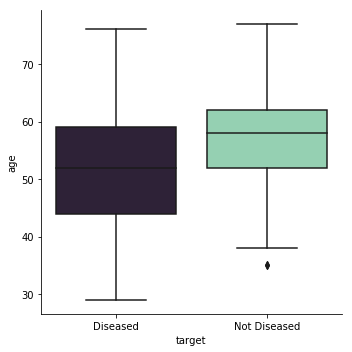

In [71]:
clr = sns.color_palette("mako") # creating palette
target = dataset["target"].map({0: "Not Diseased", 1: "Diseased"})
sns.catplot(target,'age', data=dataset, kind='box',palette=clr[::5])
plt.tight_layout()
plt.savefig('catPlot.jpg')

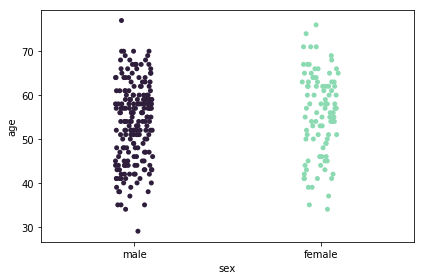

In [65]:
genders = dataset["sex"].map({0: "female", 1:"male"})
sns.stripplot(x=genders, y="age", data=dataset, palette=clr[::5])
plt.tight_layout()
plt.savefig('sawrmPlot.jpg')

C:\Users\kaygb\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


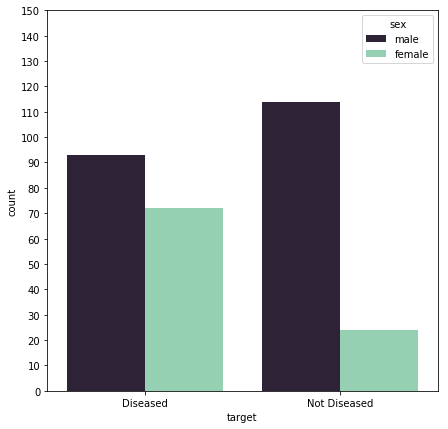

In [66]:
fig, ax = plt.subplots(1, figsize=(7, 7))
targets = dataset["target"].map({0: "Not Diseased",1: "Diseased"})
genders = dataset["sex"].map({0: "female", 1:"male"})
ax = sns.countplot(targets, hue=genders, data=dataset, palette=clr[::5], ax=ax)
_ = ax.set(yticks=list(range(0, 160, 10)))
plt.savefig('diseased_notDiseased.png')

In [67]:
#Finding the percentage of patients with heart disease and the one without heart disease{"c","b"}

count_noDisease = len(dataset[dataset.target == 0])
count_disease = len(dataset[dataset.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((count_noDisease / (len(dataset.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((count_disease / (len(dataset.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


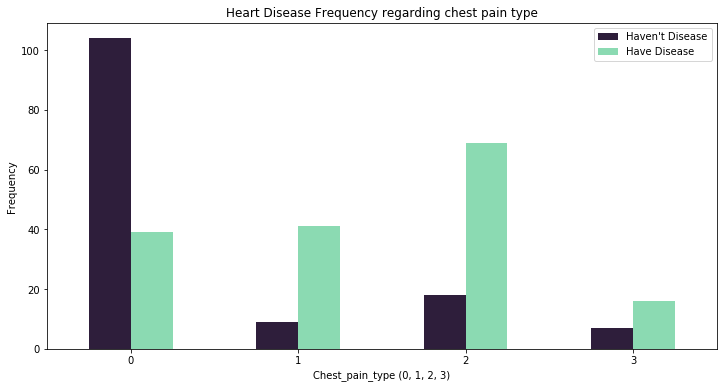

In [69]:
#Relation of heart disease with chest_pain_type. Here the chest_pain_type 2 has highest chance to have heart disease
pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",figsize=(12,6),color = clr[::5])
plt.title('Heart Disease Frequency regarding chest pain type')
plt.xlabel('Chest_pain_type (0, 1, 2, 3)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.savefig('chestPain.jpg')
plt.show()

## Machine Learning Part (RFC)

In [ ]:
X = dataset.drop(columns=['target'])
y= dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

def get_opt(n_estimators, X_train, X_test, y_train, y_test):

    classifier = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

    return(accuracies.mean()*100)

scores = {estimator: get_opt(estimator, X_train, X_test, y_train, y_test) for estimator in range(10,100)}

best_tree_size = max(scores, key=scores.get)

print(best_tree_size)   

In [ ]:
49# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =best_tree_size , criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: % {:.2f} ".format(accuracy_score(y_test, y_pred)*100))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: % {:.2f} ".format(accuracies.mean()*100))
print("Standard Deviation: % {:.2f} ".format(accuracies.std()*100))